<a href="https://colab.research.google.com/github/delicate99/Python_ML/blob/main/Advanced_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Multiple Minima vs Initial Guess & Advanced Function

$$ g(x) = x^4 -4x^2+5$$

In [2]:
# make some data
x_2 = np.linspace(-2,2, 1000)


def g(x):
  return x**4-4*x**2 +5

def dg(x):
  return 4*x**3 -8*x

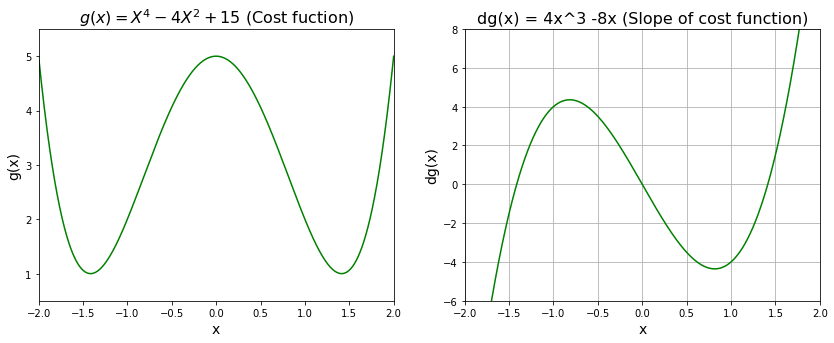

In [3]:
# Plot function and derivative

plt.figure(figsize = [14, 5])

# first : cost fuction
plt.subplot(1,2,1)
plt.plot(x_2, g(x_2), color = 'green')
plt.title('$g(x) = X ^4 -4 X^2 +15$ (Cost fuction)', fontsize = 16)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('x', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)

# 2nd : derivative fiuction
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), color = "green")
plt.title('dg(x) = 4x^3 -8x (Slope of cost function)', fontsize = 16)
plt.xlim(-2,2)
plt.ylim(-6, 8)
plt.grid()
plt.xlabel('x', fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)


plt.show()


## Gradient Descent as a Python Function

In [4]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                     max_iter = 300) :


  new_x = initial_guess
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

 
  for i in range(max_iter):
    neo_x = new_x
    gradient = derivative_func(neo_x)
    new_x = neo_x - multiplier*gradient
    step_size = abs(neo_x - new_x)

    x_list.append(new_x)
    slope_list.append(dg(new_x))

    if step_size < precision :
      break

  return new_x, x_list, slope_list




In [5]:
local_min, list_x, derivative_list = gradient_descent(dg, 0.5, 0.02, 0.01)
print('Local minium at accour at:', local_min)
print('Number of steps:', len(list_x))

Local minium at accour at: 1.3947678735885645
Number of steps: 17


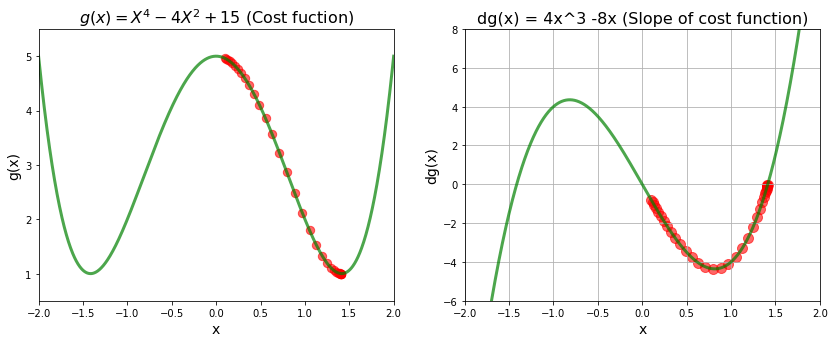

In [6]:
# Calling Gradient Desceding function 
local_min, list_x, derivative_list = gradient_descent(dg, 0.1, 0.02, 0.001)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [14, 5])

# first : cost fuction
plt.subplot(1,2,1)
plt.plot(x_2, g(x_2), color = 'green', linewidth =3, alpha = 0.7)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=70, alpha=.6)
plt.title('$g(x) = X ^4 -4 X^2 +15$ (Cost fuction)', fontsize = 16)
plt.xlim(-2,2)
plt.ylim(0.5, 5.5)
plt.xlabel('x', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)

# 2nd : derivative fiuction
plt.subplot(1,2,2)
plt.plot(x_2, dg(x_2), color = "green", linewidth = 3, alpha = 0.7)
plt.scatter(list_x, derivative_list, color = "red", s =100, alpha = 0.6)
plt.title('dg(x) = 4x^3 -8x (Slope of cost function)', fontsize = 16)
plt.xlim(-2,2)
plt.ylim(-6, 8)
plt.grid()
plt.xlabel('x', fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)


plt.show()


## Divergence Overflow and Python Tuples
$$h(x) = x^5 -2x^4 + 2$$

In [7]:
# Make function

x_3 = np.linspace(-2.5, 2.5, num = 1000)

def h(x) :
   return x**5 - 2*x**4 + 2

def dh(x) :
   return 5*x**4 - 8*x**3

In [8]:
def gradient_descent2(derivative_func, initial_guess, multiplier=0.02, precision=0.001, 
                      max_iter =300) :


  new_x = initial_guess
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

 
  for i in range(max_iter):
    neo_x = new_x
    gradient = derivative_func(neo_x)
    new_x = neo_x - multiplier*gradient
    step_size = abs(neo_x - new_x)

    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision :
      break

  return new_x, x_list, slope_list

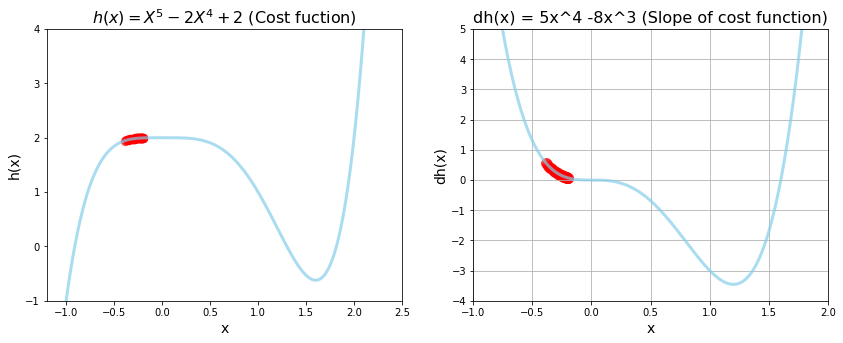

Local minium at accour at: -0.38462711054491183
Cost at this miminum is :  1.9478108712858826
Num of steps : 51


In [9]:
# Calling Gradient Desceding function 
local_min, list_x, derivative_list = gradient_descent2(dh, -0.2, 0.02, 0.001, 50)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize = [14, 5])

# first : cost fuction
plt.subplot(1,2,1)
plt.plot(x_3, h(x_3), color = 'skyblue', linewidth =3, alpha = 0.7)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=70, alpha=.6)
plt.title('$h(x) = X ^5 -2 X^4 +2$ (Cost fuction)', fontsize = 16)
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.xlabel('x', fontsize = 14)
plt.ylabel('h(x)', fontsize = 14)

# 2nd : derivative fiuction
plt.subplot(1,2,2)
plt.plot(x_3, dh(x_3), color = "skyblue", linewidth = 3, alpha = 0.7)
plt.scatter(list_x, derivative_list, color = "red", s =100, alpha = 0.6)
plt.title('dh(x) = 5x^4 -8x^3 (Slope of cost function)', fontsize = 16)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.grid()
plt.xlabel('x', fontsize = 14)
plt.ylabel('dh(x)', fontsize = 14)


plt.show()

print('Local minium at accour at:', local_min)
print('Cost at this miminum is : ', h(local_min))
print('Num of steps :', len(list_x))

In [10]:
import sys
sys.version
sys.float_info.max


1.7976931348623157e+308

## The Leraning Rate


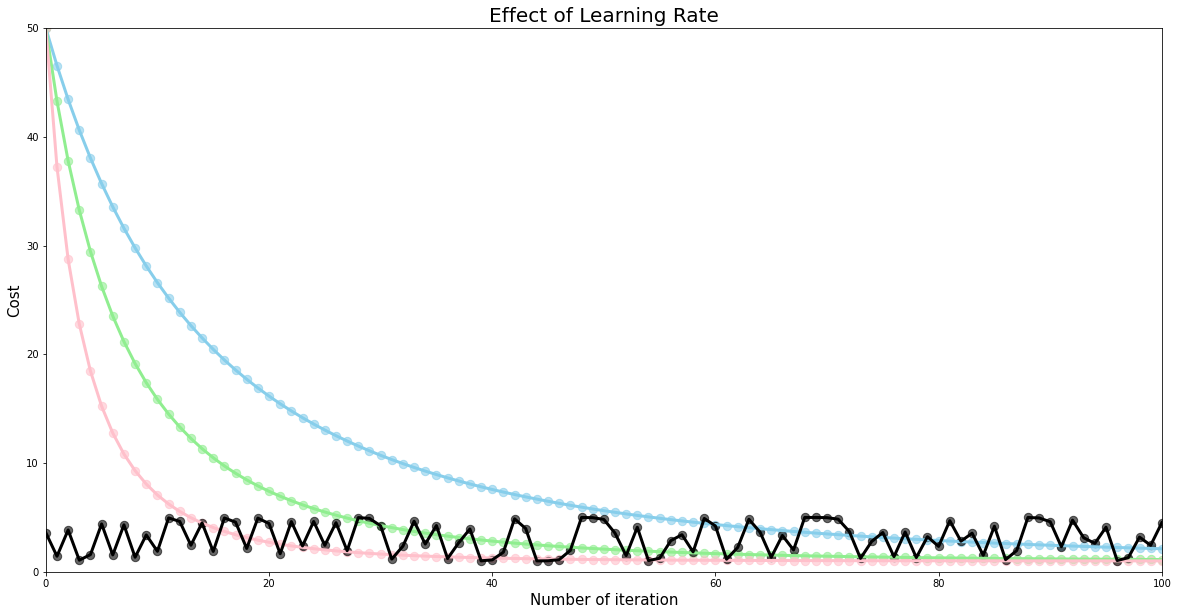

In [11]:
# Running  Gradient Descent 3 times
n = 100
low_gamma = gradient_descent2(derivative_func = dg, initial_guess =3, multiplier=0.0005, 
                               precision=0.0001, max_iter=n)
mid_gamma = gradient_descent2(derivative_func = dg, initial_guess =3, multiplier=0.001, 
                               precision=0.0001, max_iter=n)
high_gamma = gradient_descent2(derivative_func = dg, initial_guess =3, multiplier=0.002, 
                               precision=0.0001, max_iter=n)

# For comparision

insane_gamma = gradient_descent2(derivative_func = dg, initial_guess =1.9, multiplier=0.25, 
                               precision=0.0001, max_iter=n)

# Plot reduction for each iteration

plt.figure(figsize = [20,10])

# first : cost fuction
plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of Learning Rate', fontsize = 20)
plt.xlabel('Number of iteration', fontsize = 15)
plt.ylabel('Cost', fontsize = 15)

 # Values for our charts
 # Y axis data : convert list to numpy arrys
low_values = np.array(low_gamma[1])




# X axis data : crate a list from 0  to n+1
iteration_list = list(range(0,n+1))

# Plottin g low learning rate

plt.plot(iteration_list, g(low_values), color = 'skyblue', linewidth =3)
plt.scatter(iteration_list, g(low_values), color='skyblue', s=70, alpha=.6)

plt.plot(iteration_list, g(np.array(mid_gamma[1])), color = 'lightgreen', linewidth =3)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='lightgreen', s=70, alpha=0.6)

plt.plot(iteration_list, g(np.array(high_gamma[1])), color = 'pink', linewidth =3)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='pink', s=70, alpha=.6)

# insane graph
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color = 'black', linewidth =3)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='black', s=70, alpha=.6)

plt.show()